<center><font size="6"><b>Комп'ютерний практикум 2.

Первинний аналіз даних</b></font></center>

>Завантажимо бібліотеки та дані

In [134]:
! pip install pandas numpy --quiet

In [135]:
import pandas as pd
import numpy as np

In [136]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


> Розглянемо інформацію про датасет

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [138]:
# розмір датасету
df.shape

(201, 29)

In [139]:
# кількість унікальних значень для кожного стовпця
df.nunique()

symboling              6
normalized-losses     51
make                  22
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            52
length                73
width                 43
height                49
curb-weight          169
engine-type            6
num-of-cylinders       7
engine-size           43
fuel-system            8
bore                  39
stroke                36
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
city-L/100km          29
horsepower-binned      3
diesel                 2
gas                    2
dtype: int64

##__Описова статистика__

Функція `describe` автоматично обчислює базову статистику для всіх неперервних змінних. Будь-які значення `NaN` автоматично пропускаються в цій статистиці.


* кількість спостережень
* середнє значення
* стандартне відхилення (std)
* мінімальне значення
* IQR (квартилі: 25%, 50%та 75%)
* максимальне значення

## Попередній візуальний аналіз даних

In [140]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [141]:
! pip install seaborn matplotlib --quiet

> імпортуємо бібліотеки `seaborn` для створення статистичної графіки та модуль бібліотеки`matplotlib` `pyplot`

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##__Числові дані__

Числові дані представлені типом `int64` або `float64`

Для візуалізації числових даних можна використовувати діаграми розсіювання з підігнаними лініями для розуміння лінійного зв'язку між даними.

> Можна використовувати функцію `regplot` для побудови діаграми розсіювання та лінійної регресії пакету `seaborn`

<Axes: xlabel='engine-size', ylabel='price'>

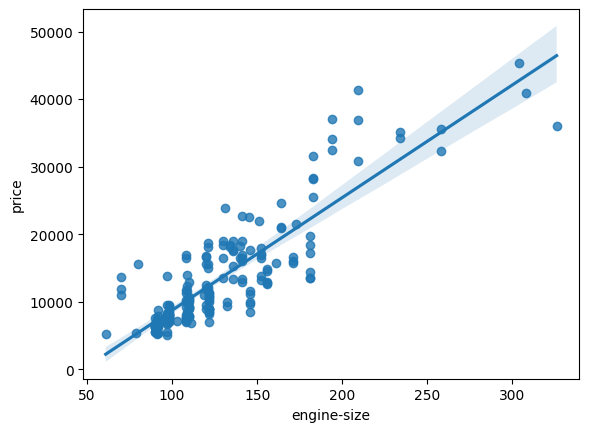

In [143]:
# Зв'язок між змінними "об'єм двигуна" та "ціна"
sns.regplot(x="engine-size", y="price", data=df)

>Для визначення кореляції між числовими змінними можна використовувати функцію `corr()`

In [144]:
# Кореляційна матриця між факторами "об'єм двигуна" та "ціна"
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


##__Категоріальні змінні__
Це змінні, які описують "характеристику" одиниці даних і вибираються з невеликої групи категорій.

Категоріальні змінні можуть мати тип `object` або `int64`.

>Візуалізувати категоріальні змінні можна за допомогою діаграми `boxplots` пакету `seaborn` відносно числової (цільової) змінної.

<Axes: xlabel='drive-wheels', ylabel='price'>

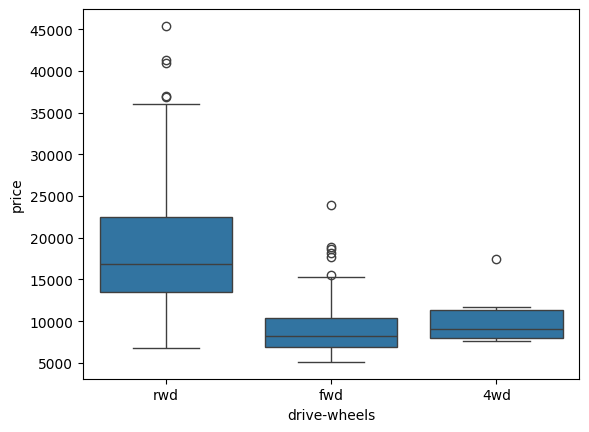

In [145]:
# трансмісія відносно ціни
sns.boxplot(x="drive-wheels", y="price", data=df)

> Якщо включити категоріальні змінні в описову статистику, то можна побачити
* кількість спостережень
* кількість унікальних записів
* значення, яке найчастіше зустрічається
* частота такого  значення

In [146]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


> Для підрахунку кількості унікальних значень певного фактору використовують функцію `value_counts`

In [147]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

> Функція `groupby` групує дані за різними категоріями. Дані групуються на основі однієї або кількох змінних, а аналіз проводиться по окремих групах.


In [148]:
#виділимо три фактора в новий датасет
df_group_one = df[['drive-wheels','body-style','price']]

In [149]:
df_group_one

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [150]:
# групування по одній категоріальній змінній як середнє числової змінної
grouped_test1 = df_group_one.groupby('drive-wheels')['price'].mean()
grouped_test1

drive-wheels
4wd    10241.000000
fwd     9244.779661
rwd    19757.613333
Name: price, dtype: float64

In [151]:
# групування по двом категоріальним змінним як середнє числової змінної
grouped_test2 = df_group_one.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test2

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


> можна групувати у зведену таблицю, використовуючи функцію `pivot()`

In [152]:
#використаємо попереднє групування для зведеної таблиці
grouped_pivot = grouped_test2.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

###__Кодування категоріальних змінних__
>Включати в модель якісну змінну типу `object` недоцільно, тому її треба інтерпретувати в "кількісний" варіант.
Є декілька підходів до кодування категоріальних змінних:

1. Співставлення кожній категорії певного числового значення (кодування міток)

<center><img src="https://miro.medium.com/max/772/1*QQe-4476Oy3_dI1vhb3dDg.png" width="400"></center>

> Таке кодування можливе за допомогою функції `LabelEncoder()` модуля `preprocessing` пакету `sklearn`

Проблема такого кодування полягає в тому, що ви створюєте порядок в значеннях фактору, там де його може не бути, виходом є інший варінт кодування:

2. Створюються штучні змінні, які відповідають певній категорії, і в результаті ми отримаємо не одне значення-код, а вектор з '0' та '1', що звісно обтяжує модель змінними, але не надає перевагу жодній категорії.

Такий вид кодування називають _наївним_ або _dummy-кодуванням_

<center><img src="https://miro.medium.com/max/3600/1*ggtP4a5YaRx6l09KQaYOnw.png" width="600"></center>

> Даний вид кодування забезпечується функцією `OneHotEncoder()` модуля `preprocessing` пакету `sklearn` або функцією `get_dummies()` пакету `pandas`

3. Можна співставляти кожній категорії кількість значень, які вона містить

4. Інші способі кодування



In [153]:
! pip install scikit-learn --quiet

In [154]:
# імпортуємо модуль preprocessing
from sklearn import preprocessing

In [155]:
le = preprocessing.LabelEncoder() # обираємо функцію LabelEncoder()
le.fit(df['drive-wheels']) # застосовуємо її до категоріального фактору 'drive-wheels'
df['drive-wheels']=le.transform(df['drive-wheels']) # заміняємо категоріальні значення на закодовані



In [156]:
df['drive-wheels']

0      2
1      2
2      2
3      1
4      0
      ..
196    2
197    2
198    2
199    2
200    2
Name: drive-wheels, Length: 201, dtype: int64

> Застосуємо `OneHotEncoder()` до стовпця `'drive-wheels'`

In [157]:
df1=df['drive-wheels'] # використаємо закодований на попередньому етапі фактор 'drive-wheels'
ohe = preprocessing.OneHotEncoder(sparse_output=False) # обираємо функцію OneHotEncoder()
df1=ohe.fit_transform(df1.values.reshape(-1,1)) # заміняємо значення стовпця на векторні значення

In [158]:
df1

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1

> Застосуємо `get_dummies()` до фактору `'body-style'`


In [159]:
ohe_dum= pd.get_dummies(df[['body-style']])

In [160]:
ohe_dum


,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,True,False,False,False,False
1,True,False,False,False,False
2,False,False,True,False,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
196,False,False,False,True,False
197,False,False,False,True,False
198,False,False,False,True,False
199,False,False,False,True,False


> Закодуємо категорії стовпця `'body-style'` кількістю їх значень

In [161]:
df['body-style'].value_counts()

body-style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [162]:
df2=df['body-style'].map(df.groupby('body-style').size())

In [163]:
df2

0       6
1       6
2      68
3      94
4      94
       ..
196    94
197    94
198    94
199    94
200    94
Name: body-style, Length: 201, dtype: int64

##__Визначення та обробка відсутніх значень (Missing Values)__

___Перетворення `?` на `NaN`___

для заміни А на В можна використати команду
 <pre> .replace (A, B, inplace = True) </pre>


In [164]:
#NAN значення формуються командою nan пакету numpy
df.replace("?", np.nan, inplace = True)

>Існує два методи виявлення відсутніх даних:

1. <b> .isnull () </b>
2. <b> .notnull () </b>

На виході отримаємо логічне значення, яке вказує на те, що значення, передане в аргумент, фактично не містить даних.

In [165]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Порахуємо кількість пропущених значень

In [166]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
symboling
False    201
Name: count, dtype: int64

normalized-losses
normalized-losses
False    201
Name: count, dtype: int64

make
make
False    201
Name: count, dtype: int64

aspiration
aspiration
False    201
Name: count, dtype: int64

num-of-doors
num-of-doors
False    201
Name: count, dtype: int64

body-style
body-style
False    201
Name: count, dtype: int64

drive-wheels
drive-wheels
False    201
Name: count, dtype: int64

engine-location
engine-location
False    201
Name: count, dtype: int64

wheel-base
wheel-base
False    201
Name: count, dtype: int64

length
length
False    201
Name: count, dtype: int64

width
width
False    201
Name: count, dtype: int64

height
height
False    201
Name: count, dtype: int64

curb-weight
curb-weight
False    201
Name: count, dtype: int64

engine-type
engine-type
False    201
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    201
Name: count, dtype: int64

engine-size
engine-size
False    201
Name: count, dtype: int64

Для візуального відображення пропущених значень можна скористатись функцією `heatmap()` подавши у якості аргументу функцыю визначення пропущених значень `df.isnull()`

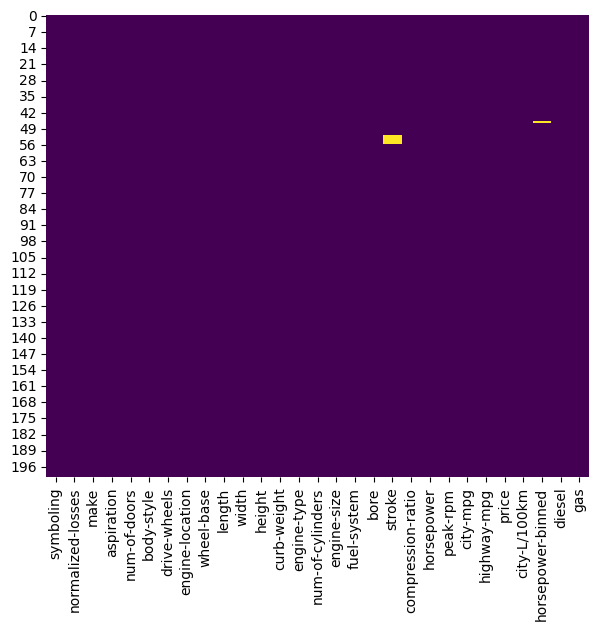

In [167]:
plt.figure(figsize=(7,6))
sns.heatmap(df.isnull(), cbar=False,cmap='viridis')
plt.show()

##__Усунення пропущених даних__

  1. Видалити дані <br>
        а. Видалити весь рядок <br>
        b. Видалити весь стовпець (стовпчик незначний для моделі, або містить 50% і білше пропущених значень)
  2. Замінити дані <br>
        а. Замінити на середнє,максимальне, мінімальне (для числових значень) <br>
        b. Замінити на найчастіш вживане (для категоріальних даних) <br>
        c. Замінити іншою функцією

In [168]:
# Обчислимо середнє для фактору "stroke"
avg_stroke=df['stroke'].astype('float').mean(axis=0)
print("Середнє для stroke:", avg_stroke)

Середнє для stroke: 3.256903553299492


In [169]:
# Замінимо NaN у факторі "stroke" на середнє
df["stroke"].replace(np.nan, avg_stroke, inplace=True)

/tmp/ipykernel_17409/3222378036.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["stroke"].replace(np.nan, avg_stroke, inplace=True)


In [170]:
# Перевіримо наявність пропущених значень в даному факторі
missing_data = df.isnull()
print (missing_data["stroke"].value_counts())

stroke
False    201
Name: count, dtype: int64


> якщо необхідно видалити рядок з NaN використовують команду
`dropna()`

> після цього краще "перезавантажити" індекси для коректного відтворення датасету за допомогою команди `reset_index(drop=True, inplace=True)`

In [171]:
# видалимо рядок з  NaN в стовбчику  "horsepower-binned"
df.dropna(subset=["horsepower-binned"], axis=0, inplace=True)

# перезапишемо індекси, оскільки було одне видалення
df.reset_index(drop=True, inplace=True)

In [172]:
# Перевіримо наявність пропущених значень в даному факторі
missing_data = df.isnull()
print (missing_data["horsepower-binned"].value_counts())

horsepower-binned
False    200
Name: count, dtype: int64


##__Групуванн даних (Binning)__
> __Бінінг__ - це процес перетворення числових даних у категоріальні. Зручний для числових значень широкого діапазону. Вихідні значення даних, які потрапляють у заданий невеликий проміжок - бін, замінюються значенням, що є представником цього інтервалу, часто центральним значенням.
Виділяють:

* Групування з фіксованою шириною бінів
* Квантильне групування
* Інстинктивне групування

> Групування можна здійснювати вручну, або за допомогою функції `LKBinsDiscretizer()` модуля `preprocessing` пакету `sklearn`




In [173]:
from sklearn.preprocessing import KBinsDiscretizer  # імпортуємо функцію
est = KBinsDiscretizer(n_bins = 5, encode = 'ordinal', strategy='quantile') # розіб'ємо на 5 груп квантильним підходом
df['price_code'] = est.fit_transform(np.array(df['price']).reshape(-1,1)) # створимо нову колонку з відповідним кодуванням в датасеті
df[['price','price_code']] #вивидемо оригінальний та перетворений стовпець


,price,price_code
0,13495.0,3.0
1,16500.0,3.0
2,16500.0,3.0
3,13950.0,3.0
4,17450.0,4.0
...,...,...
195,16845.0,3.0
196,19045.0,4.0
197,21485.0,4.0
198,22470.0,4.0


## __Нормалізація та Стандартизація даних__

> __Нормалізація даних__ - це зміна значень числових стовпців у наборі даних до загальної шкали (певного інтервалу значень), без спотворення відмінностей у діапазонах значень.

> __Стандартизація даних__ передбачає таке пертворення даних, що призводить до нормального розподілу

Часто використовують таке масштабування даних:
* MinMax
$$ X_iscal = \frac{X_i - min(X)}{max(X) - min(X)} $$
* Standart Scaler
$$ X_iscal = \frac{X_i - mean(X)}{std(X)} $$
* Max
$$ X_iscal = \frac{X_i}{max(X)} $$
* $L_1$ norm
$$ X_iscal = \frac{X_i}{\sum_{i=1}^{m}X_i} $$
* $L_2$ norm (Euclidean norm)
$$ X_iscal = \frac{X_i}{\sqrt{\sum_{i=1}^{m}X_i^2}} $$

>Для MinMax-ного масштабування, яке перетворює числові дані в проміжок $[0, 1]$, можна використовувати функцію `MinMaxScaler()` модуля `preprocessing` пакету `sklearn`

> Для стандартизації можна використовувати функцію  `StandardScaler()`модуля `preprocessing` пакету `sklearn`


Виділимо новий датасет із вихідного з певними числовими факторами

In [174]:
new_df=df[['wheel-base','length','width','height']]
new_df.head()

,wheel-base,length,width,height
0,88.6,0.811148,0.890278,48.8
1,88.6,0.811148,0.890278,48.8
2,94.5,0.822681,0.909722,52.4
3,99.8,0.848630,0.919444,54.3
4,99.4,0.848630,0.922222,54.3


In [175]:
# MimMax-масштабування
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
new_df1 = MMS.fit_transform(new_df)

In [176]:
# перетворюємо отриманий масив у фрейм
new_df_mms=pd.DataFrame({'wheel-base':new_df1[:,0],'length':new_df1[:,1],'width':new_df1[:,2],'height':new_df1[:,3]})
new_df_mms.head()

,wheel-base,length,width,height
0,0.058309,0.413433,0.324786,0.000000
1,0.058309,0.413433,0.324786,0.000000
2,0.230321,0.449254,0.444444,0.327273
3,0.384840,0.529851,0.504274,0.500000
4,0.373178,0.529851,0.521368,0.500000


In [177]:
new_df_mms.describe()

,wheel-base,length,width,height
count,200.000000,200.000000,200.000000,200.000000
mean,0.355131,0.492739,0.475684,0.454227
std,0.177182,0.183438,0.177776,0.219732
min,0.000000,0.000000,0.000000,0.000000
25%,0.230321,0.381716,0.324786,0.290909
50%,0.301749,0.479104,0.444444,0.481818
75%,0.460641,0.628358,0.532051,0.611364
max,1.000000,1.000000,1.000000,1.000000


In [178]:
# Стандартизація даних
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
new_df1 = SS.fit_transform(new_df)

In [179]:
# перетворюємо отриманий масив у фрейм
new_df_ss=pd.DataFrame({'wheel-base':new_df1[:,0],'length':new_df1[:,1],'width':new_df1[:,2],'height':new_df1[:,3]})
new_df_ss.head()

,wheel-base,length,width,height
0,-1.679447,-0.433416,-0.850939,-2.072374
1,-1.679447,-0.433416,-0.850939,-2.072374
2,-0.706189,-0.237651,-0.176164,-0.579219
3,0.168093,0.202821,0.161223,0.208834
4,0.102110,0.202821,0.257619,0.208834


In [180]:
new_df_ss.describe()

,wheel-base,length,width,height
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,-9.237056e-16,1.829648e-15,1.718625e-15,2.362555e-15
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-2.009365e+00,-2.692874e+00,-2.682469e+00,-2.072374e+00
25%,-7.061892e-01,-6.067501e-01,-8.509388e-01,-7.451254e-01
50%,-3.020398e-01,-7.451316e-02,-1.761643e-01,1.258812e-01
75%,5.969864e-01,7.411756e-01,3.178670e-01,7.169214e-01
max,3.648727e+00,2.772240e+00,2.956717e+00,2.490042e+00


##<center>__Самостійні завдання__</center>

> Скопіювати блок самостійних завдань в окремий файл ***LastName_CP2.ipynb***

> Інсталюйте необхідні пакети бібліотек Python

### Завдання №1

Завантажте дані з ресурсу

URL = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

In [181]:
# МІСЦЕ ДЛЯ КОДУ
import pandas as pd

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Завдання №2

* Виведіть інформацію про датасет, описову статистику для кількісних змінних та для якісних змінних

* побудуйте графік регресії для змінних `Survived` та `Pclass`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


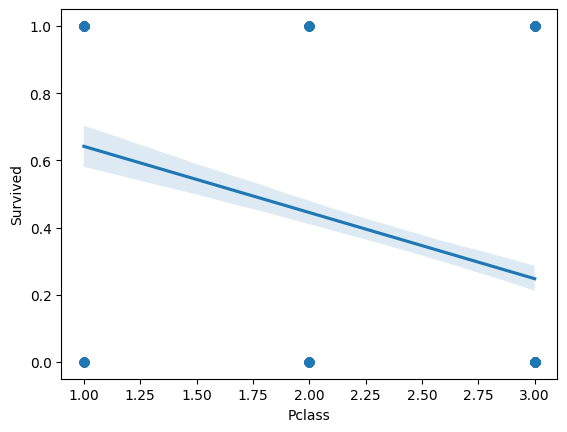

(None,
        PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  714.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.699118    0.523008   
 std     257.353842    0.486592    0.836071   14.526497    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   20.125000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   38.000000    1.000000   
 max     891.000000    1.000000    3.000000   80.000000    8.000000   
 
             Parch        Fare  
 count  891.000000  891.000000  
 mean     0.381594   32.204208  
 std      0.806057   49.693429  
 min      0.000000    0.000000  
 25%      0.000000    7.910400  
 50%      0.000000   14.454200  
 75%      0.000000   31.000000  
 max      6.000000  512.329200  ,
                        Name   Sex Ticket Cabin Embark

In [182]:
# МІСЦЕ ДЛЯ КОДУ
info = df.info()
desc_numeric = df.describe()
desc_categorical = df.describe(include=['object'])

sns.regplot(x='Pclass', y='Survived', data=df)
plt.show()

info, desc_numeric, desc_categorical

### Завдання №3

* побудуйте `heatmap()` для візуального відображення пропущених значень
* для кількісної змінної поповніть пропущені дані середнім значенням
* для категоріальної змінної поповніть пропущені значення значенням, яке зустрічається найчастіше

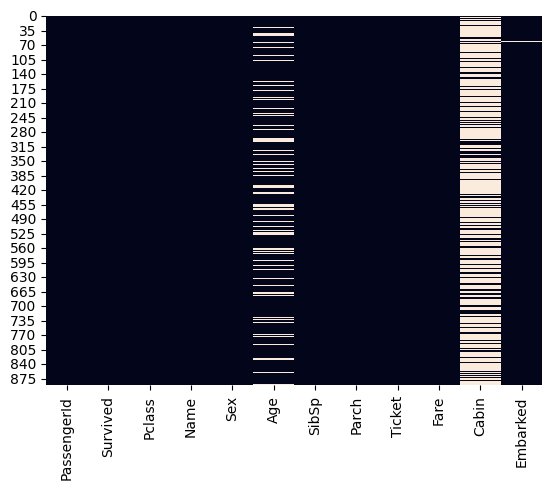

/tmp/ipykernel_17409/388158958.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipykernel_17409/388158958.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

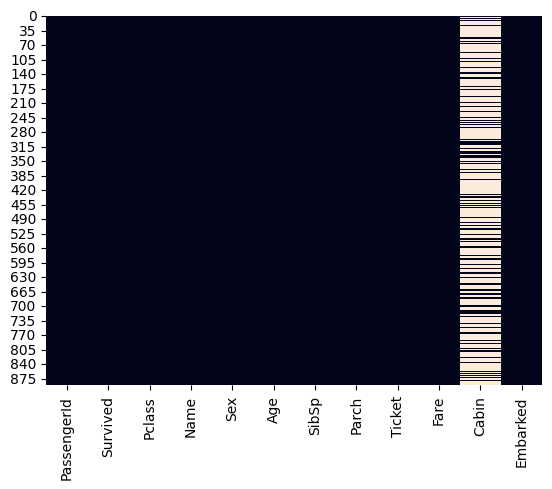

In [183]:
# МІСЦЕ ДЛЯ КОДУ
import seaborn as sns

sns.heatmap(df.isnull(), cbar=False)
plt.show()

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

sns.heatmap(df.isnull(), cbar=False)
plt.show()

### Завдання №4

Оберіть 4 категоріальних змінних та закодуйте:
* Змінну_1 -  за допомогою функції `LabelEncoder()`
* Змінну_2 -  за допомогою функції `get_dummies()`
* Змінну_3 -  за допомогою функції `OneHotEncoder()`
* Змінну_4 -  кількістю значень відповідної категорії


In [184]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
df['Sex_encoded'] = label_encoder.fit_transform(df['Sex'])

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_pclass = one_hot_encoder.fit_transform(df[['Pclass']])
encoded_pclass_df = pd.DataFrame(encoded_pclass, columns=one_hot_encoder.get_feature_names_out(['Pclass']))
df = pd.concat([df, encoded_pclass_df], axis=1)

df['Cabin_count'] = df.groupby('Cabin')['Cabin'].transform('count')

df[['Sex_encoded', 'Embarked_S', 'Pclass_2', 'Pclass_3', 'Cabin_count']].head()


,Sex_encoded,Embarked_S,Pclass_2,Pclass_3,Cabin_count
0,1,True,0.0,1.0,NaN
1,0,False,0.0,0.0,1.0
2,0,True,0.0,1.0,NaN
3,0,True,0.0,0.0,2.0
4,1,True,0.0,1.0,NaN


### Завдання №5
Поділіть на 4 вікові групи змінну `Age`

In [185]:
# МІСЦЕ ДЛЯ КОДУ
df['Age_group'] = pd.cut(df['Age'], bins=4, labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

df[['Age', 'Age_group']].head()

,Age,Age_group
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult


### Завдання №6

* Створіть новий датафрейм з вихідного тільки із числових значень
* Застосуйте $MinMax$-Нормування даних та збережіть в новий датафрейм, виведіть описову статистику
* Застосуйте $Standart Scaling$ даних та збережіть в новий датафрейм, виведіть описову статистику
* Застосуйте $L_1$-Нормування та збережіть в новий датафрейм, виведіть описову статистику

In [186]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize

numeric_df = df.select_dtypes(include=['float64', 'int64']).fillna(df.select_dtypes(include=['float64', 'int64']).mean())

min_max_scaler = MinMaxScaler()
min_max_normalized_df = pd.DataFrame(min_max_scaler.fit_transform(numeric_df), columns=numeric_df.columns)
min_max_desc = min_max_normalized_df.describe()

standard_scaler = StandardScaler()
standard_scaled_df = pd.DataFrame(standard_scaler.fit_transform(numeric_df), columns=numeric_df.columns)
standard_scaled_desc = standard_scaled_df.describe()

l1_normalized_df = pd.DataFrame(normalize(numeric_df, norm='l1'), columns=numeric_df.columns)
l1_normalized_desc = l1_normalized_df.describe()

min_max_desc, standard_scaled_desc, l1_normalized_desc


(       PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  891.000000  891.000000   
 mean      0.500000    0.383838    0.654321    0.367921    0.065376   
 std       0.289162    0.486592    0.418036    0.163383    0.137843   
 min       0.000000    0.000000    0.000000    0.000000    0.000000   
 25%       0.250000    0.000000    0.500000    0.271174    0.000000   
 50%       0.500000    0.000000    1.000000    0.367921    0.000000   
 75%       0.750000    1.000000    1.000000    0.434531    0.125000   
 max       1.000000    1.000000    1.000000    1.000000    1.000000   
 
             Parch        Fare  Sex_encoded    Pclass_2    Pclass_3  \
 count  891.000000  891.000000   891.000000  891.000000  891.000000   
 mean     0.063599    0.062858     0.647587    0.206510    0.551066   
 std      0.134343    0.096995     0.477990    0.405028    0.497665   
 min      0.000000    0.000000     0.000000    0.000000    0.000000   
 25%